# assignment11

# Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [4]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# preprocessing the dataset

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
bos.columns=boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [9]:
print(boston.target[:10])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [10]:
bos['price']=boston.target

In [11]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We will fit a linear regression model and predict the Boston housing prices. We will use the least squares method as the way to estimate the coefficients

Y = boston housing price

X = all the other features (or independent variables)

We will import linear regression from sci-kit learn module and will drop the price column as we want only the parameters as our X values. We wil store linear regression object in a variable called lm.

In [12]:
from sklearn.linear_model import LinearRegression
X=bos.drop('price',axis=1)

In [13]:
lm=LinearRegression() #creating the instance lm of the class linearRegression
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# fit the model

In [14]:
lm.fit(X,bos.price) #fits a linear model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print('The estimated intercept is:',lm.intercept_) #intercept value

The estimated intercept is: 36.49110328036135


In [16]:
print('number of coefficients:',len(lm.coef_))  #number of coefficients

number of coefficients: 13


# Applying predict method to predict y

In [17]:
lm.predict(X)[:10] #Predicts the  Y using the linear model with estimated coefficients

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232,
       25.25940048, 23.00433994, 19.5347558 , 11.51696539, 18.91981483])

In [18]:
outcome = pd.DataFrame(list(zip(X.columns,lm.coef_)),columns = ['features','estimated coef']) 
outcome

,features,estimated coef
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


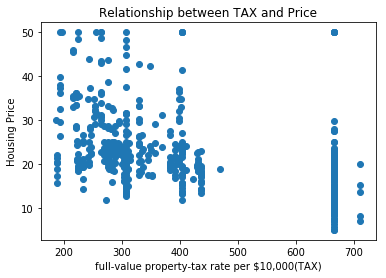

In [19]:
plt.scatter(bos.TAX, bos.price)
plt.ylabel("Housing Price")
plt.xlabel("full-value property-tax rate per $10,000(TAX)")
plt.title("Relationship between TAX and Price")
plt.show()

Text(0,0.5,'Predicted Prices')

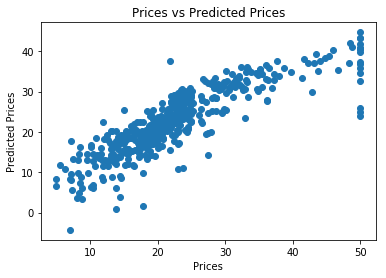

In [20]:
plt.scatter(bos.price, lm.predict(X))        # comparing true prices and predicted prices

plt.title ('Prices vs Predicted Prices')
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')

In [21]:
mseFull = np.mean((bos.price - lm.predict(X)) **2)
print(mseFull)

21.897779217687496


# Splitting the dataset into training and test dataset

in practice we wont implement Linear Regression on the entire data set, we will have to split data set into training and test data sets. So that we train our model on training data and see how well it performed on test sets. We can create training and test data sets manually, but this is not the right way to do , because we may be training our model on less expensive houses and testing on expensive houses.
We have to divide our data sets randomly. Scikit learn provides a function called train_test_split to do this.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X, bos.price, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


# Applying the linear regression model

In [23]:
lm = LinearRegression()
lm.fit(X_train,Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [33]:
print(" calculate MSE with Y_train: ",np.mean((Y_train - pred_train)**2))

print("calculate MSE with X_test, Y_test:",np.mean((Y_test-pred_test)**2))

 calculate MSE with Y_train:  19.546758473534684
calculate MSE with X_test, Y_test: 28.541367275618345


Text(0,0.5,'Residuals')

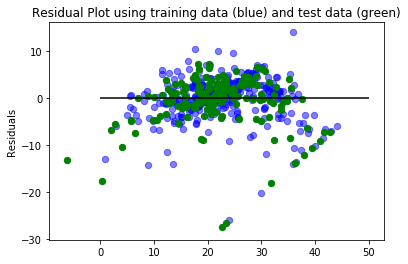

In [31]:
# Analyzing the Residual Plots
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.title('Residual Plot using training data (blue) and test data (green)')
plt.ylabel('Residuals')